In [1]:
import dask.dataframe as dd
import dask.array as da
import pandas as pd
import numpy as np
import fastparquet
from dask import delayed, visualize

In [2]:
from distributed import Client
client = Client('10.128.0.4:8786')
client

<Client: scheduler='tcp://10.128.0.4:8786' processes=9 cores=10>

In [3]:
@delayed
def create_data(i, n):
    chunk = 1000000
    for i, (start, end) in enumerate(zip(range(0, n*chunk, chunk), range(chunk, (n+1)*chunk, chunk))):
        print(i, start, end)
        return pd.DataFrame.from_records(np.random.random((chunk, 10)),
                                        columns=list('asbdefghij'),
                                        index=np.arange(start, end))

In [4]:
loaded_df = [create_data(x, 100) for x in range(100)]

In [5]:
dfs = dd.from_delayed(loaded_df)

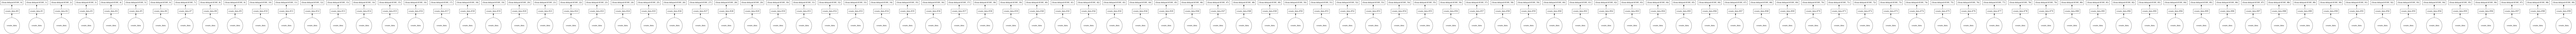

In [6]:
visualize(dfs)

In [7]:
dfr = client.persist(dfs)

In [10]:
dfrmax = client.persist(dfr.max())

In [13]:
dfrmax.compute()

a    1.0
s    1.0
b    1.0
d    1.0
e    1.0
f    1.0
g    1.0
h    1.0
i    1.0
j    1.0
dtype: float64

In [17]:
visualize(dfr.rolling(10).mean().max())

In [15]:
dfrrolling_meanmax = client.persist(dfr.rolling(10).mean().max())

In [16]:
dfrrolling_meanmax.compute()

a    0.929482
s    0.923282
b    0.929550
d    0.928853
e    0.917819
f    0.927681
g    0.937215
h    0.926679
i    0.937198
j    0.931014
dtype: float64